# 5. 激活函数：给机器注入灵魂

[bilibili 课程地址](https://www.bilibili.com/cheese/play/ep7129?csource=common_searchlecture_lecturecard_null)


## 课程要点

本课通过激活函数和求导思路,扩展了神经网络模型和优化算法,为后续学习打下基础。

- 引入激活函数
  - 将线性模型扩展为非线性模型,增加处理复杂问题的能力
  - 使用sigmod函数作为示例激活函数
- 求导思路
  - 利用复合函数思路求导,将前向传播分解为内嵌函数
  - 以此简化求导的过程
- 编程实现
  - 将激活函数加入预测模型
  - 根据复合函数链式求导法则计算各参数导数  
  - 使用梯度下降更新参数


## 代码实践

In [1]:
%pip install matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import dataset
from matplotlib import pyplot as plt
import numpy as np

In [6]:
# 模拟数据集
data_size = 100
x_array, y_array = dataset.get_beans_class(data_size)
print(x_array)
print(y_array)

[0.00134204 0.00431732 0.00968115 0.01318752 0.01502975 0.02833665
 0.03535729 0.0415769  0.07152839 0.07514058 0.08108936 0.08983365
 0.09408327 0.09881041 0.12015034 0.12610692 0.12941209 0.13762603
 0.14269542 0.16835325 0.17957057 0.18869576 0.19933792 0.24440533
 0.2503506  0.25177851 0.26144853 0.26622794 0.27211382 0.27384563
 0.27700199 0.2780506  0.27975595 0.28898517 0.28938214 0.30020735
 0.3034644  0.31393091 0.32159799 0.32543412 0.34490839 0.36251743
 0.36463258 0.39550872 0.40386415 0.41829708 0.42252082 0.42604503
 0.42664828 0.43865833 0.44924503 0.46940226 0.47170099 0.47905707
 0.50983545 0.51646112 0.51752373 0.52162427 0.53505727 0.55784474
 0.56315391 0.57411354 0.57612925 0.57942869 0.58455916 0.60240668
 0.61373936 0.62275052 0.62619051 0.64011765 0.65964008 0.66366481
 0.66801754 0.70425003 0.7069799  0.70823551 0.72339879 0.73151206
 0.74228364 0.75901435 0.78997976 0.7910312  0.80315268 0.80740064
 0.81985662 0.82011993 0.8252446  0.82711396 0.8551151  0.8966

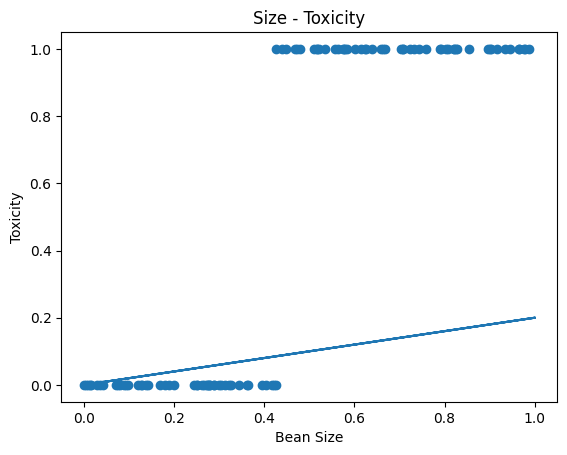

In [7]:
# 绘制豆豆大小和毒性关系的图表，带有偏置 B
plt.title("Size - Toxicity", fontsize = 12)
plt.xlabel("Bean Size")
plt.ylabel("Toxicity")

# 绘制豆豆的数据
plt.scatter(x_array, y_array)

# 权重，先设置一个默认值
weight = 0.2
y_pre = weight * y_array

# 绘制预测的数据
plt.plot(y_array,y_pre)
plt.show()


In [43]:
# 执行后，matplotlib 会启动一个单独的窗口进行绘制
# %matplotlib osx

# 切回 notebook 中绘图
%matplotlib inline

In [17]:
# 训练数据，得到对于的 weight 和 bisa

# 随机生成 weight 和 bisa
weight = 0.1
bisa = 0.1


for step in range(100): #训练次数
    for index in range(data_size): # 训练的数据集
        # 数据本身
        x = x_array[index]
        y = y_array[index]
        
        # 求导，前向传播
        z = weight * x + bisa
        a = 1/(1 + np.exp(-z))
        e = (y - a)**2

        deda = -2 * (y-a)
        dadz = a* (1-a)   

        dzdw = x
        dedw = deda * dadz * dzdw
        dzdb = 1
        dedb = deda* dadz * dzdb

        # 修正 weight 和 bisa，反向传播
        learn_rate = 0.05
        weight = weight - learn_rate * dedw
        bisa = bisa - learn_rate * dedb


print(f"weight: {weight}, bisa: {bisa}")


weight: 7.37543856015174, bisa: -3.0963761416639977


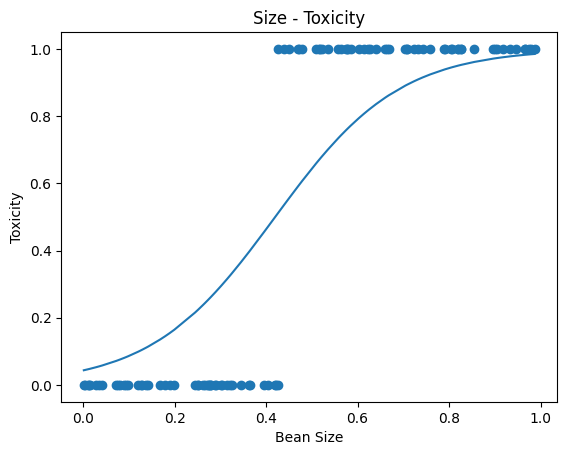

In [18]:
# 绘制豆豆大小和毒性关系的图表，带有偏置 B
plt.title("Size - Toxicity", fontsize = 12)
plt.xlabel("Bean Size")
plt.ylabel("Toxicity")
# 绘制豆豆的数据
plt.scatter(x_array, y_array)

z = weight * x_array + bisa
a = 1/(1 + np.exp(-z))
y_pre = a
plt.plot(x_array, a)